In [1]:
from __future__ import print_function
import torch as t

In [2]:
x = t.Tensor(5, 3)

In [3]:
x


    0.0000     0.0000     0.0000
    0.0000 -1361.6133     0.0000
    0.0000     0.0000   -28.2084
    0.0000   -28.2060     0.0000
  -28.2060     0.0000     0.0000
[torch.FloatTensor of size 5x3]

In [4]:
x = t.rand(5,4 )

In [5]:
x


 0.8231  0.5937  0.9202  0.3132
 0.2968  0.4121  0.7965  0.4677
 0.8924  0.9041  0.7524  0.8269
 0.4694  0.5358  0.3160  0.5115
 0.8431  0.8526  0.9722  0.5095
[torch.FloatTensor of size 5x4]

In [6]:
x.shape

torch.Size([5, 4])

In [7]:
x.size()

torch.Size([5, 4])

In [8]:
x[:, 1]


 0.5937
 0.4121
 0.9041
 0.5358
 0.8526
[torch.FloatTensor of size 5]

In [10]:
a = t.ones(5)

In [11]:
b = a.numpy()

In [12]:
b

array([1., 1., 1., 1., 1.], dtype=float32)

In [13]:
import numpy as np

In [14]:
a = np.ones(5)
b = t.from_numpy(a)

In [15]:
a

array([1., 1., 1., 1., 1.])

In [16]:
b


 1
 1
 1
 1
 1
[torch.DoubleTensor of size 5]

In [17]:
b.add_(1)


 2
 2
 2
 2
 2
[torch.DoubleTensor of size 5]

In [18]:
a

array([2., 2., 2., 2., 2.])

In [24]:
if t.cuda.is_available():
    x = x.cuda()
    y = x.cuda()
    c = x+y

In [25]:
c


 1.6461  1.1874  1.8405  0.6263
 0.5937  0.8242  1.5930  0.9354
 1.7847  1.8082  1.5048  1.6539
 0.9388  1.0716  0.6320  1.0230
 1.6863  1.7051  1.9445  1.0189
[torch.cuda.FloatTensor of size 5x4 (GPU 0)]

In [26]:
from torch.autograd import Variable

In [27]:
x = Variable(t.ones(2, 2), requires_grad =True)

In [28]:
x

Variable containing:
 1  1
 1  1
[torch.FloatTensor of size 2x2]

In [39]:
y = x.sum()

In [40]:
y

Variable containing:
 4
[torch.FloatTensor of size 1]

In [41]:
y.grad_fn

In [42]:
y.backward()

In [43]:
y

Variable containing:
 4
[torch.FloatTensor of size 1]

In [44]:
x.grad

Variable containing:
 2  2
 2  2
[torch.FloatTensor of size 2x2]

In [45]:
y.backward()

In [46]:
x.grad

Variable containing:
 3  3
 3  3
[torch.FloatTensor of size 2x2]

In [47]:
x.grad.data.zero_()


 0  0
 0  0
[torch.FloatTensor of size 2x2]

In [48]:
y.backward()
x.grad

Variable containing:
 1  1
 1  1
[torch.FloatTensor of size 2x2]

In [49]:
x = Variable(t.ones(4, 5))
y = t.cos(x)

In [50]:
x_tensor_cos = t.cos(x.data)

In [51]:
y

Variable containing:
 0.5403  0.5403  0.5403  0.5403  0.5403
 0.5403  0.5403  0.5403  0.5403  0.5403
 0.5403  0.5403  0.5403  0.5403  0.5403
 0.5403  0.5403  0.5403  0.5403  0.5403
[torch.FloatTensor of size 4x5]

In [52]:
x_tensor_cos


 0.5403  0.5403  0.5403  0.5403  0.5403
 0.5403  0.5403  0.5403  0.5403  0.5403
 0.5403  0.5403  0.5403  0.5403  0.5403
 0.5403  0.5403  0.5403  0.5403  0.5403
[torch.FloatTensor of size 4x5]

In [2]:
import torch.nn as nn
import torch.nn.functional as F

In [63]:
class Net(nn.Module):
    
    def __init__(self):
        # nn.Module子类的函数必须在构造函数中执行父类的构造函数
        super(Net, self).__init__()
        # 卷积层层'1'表示输入图片为单通道，'6'表示输出通道数，'5'表示卷积核位5*5
        self.conv1 = nn.Conv2d(1, 6, 5)
        # 卷积层
        self.conv2 = nn.Conv2d(6, 16, 5)
        # 仿射层/全连接层 y = Wx+b
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        # 卷积-> 激活 -> 池化
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        # reshape '1'表示自适应
        x = x.view(x.size()[0], -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [64]:
net = Net()

In [65]:
net

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [66]:
params = list(net.parameters())

In [67]:
len(params)

10

In [68]:
for name, parameters in net.named_parameters():
    print(name, ':', parameters.size())

conv1.weight : torch.Size([6, 1, 5, 5])
conv1.bias : torch.Size([6])
conv2.weight : torch.Size([16, 6, 5, 5])
conv2.bias : torch.Size([16])
fc1.weight : torch.Size([120, 400])
fc1.bias : torch.Size([120])
fc2.weight : torch.Size([84, 120])
fc2.bias : torch.Size([84])
fc3.weight : torch.Size([10, 84])
fc3.bias : torch.Size([10])


In [69]:
input = Variable(t.randn(1, 1, 32, 32))

In [70]:
out = net(input)

In [71]:
out.size()

torch.Size([1, 10])

In [72]:
net.zero_grad() # 梯度清零
out.backward(Variable(t.ones(1, 10))) 

In [78]:
output = net(input)
target = Variable(t.arange(0, 10))
criterion = nn.MSELoss()
loss = criterion(output, target)

In [79]:
loss

Variable containing:
 27.9454
[torch.FloatTensor of size 1]

In [80]:
net.zero_grad()
print("反向传播之前conv1.bias的梯度")
print(net.conv1.bias.grad)
loss.backward()
print('反向传播之后conv1.bias的梯度')
print(net.conv1.bias.grad)

反向传播之前conv1.bias的梯度
Variable containing:
 0
 0
 0
 0
 0
 0
[torch.FloatTensor of size 6]

反向传播之后conv1.bias的梯度
Variable containing:
 0.0476
-0.0712
 0.0957
-0.1009
-0.0675
 0.0506
[torch.FloatTensor of size 6]



In [81]:
# 随机梯度下降实现
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data + learning_rate)

In [82]:
import torch.optim as optim

In [83]:
optimizer = optim.SGD(net.parameters(), lr = 0.01)
# 梯度清零
optimizer.zero_grad()
# 计算损失
output = net(input)
loss = criterion(output, target)
# 反向传播
loss.backward()
# 更新参数
optimizer.step()

## CIFAR-10 分类

In [85]:
import torchvision as tv
import torchvision.transforms as transforms
from torchvision.transforms import ToPILImage
show = ToPILImage()  # 可以把Tensor转成Image，方便可视化

In [92]:
# 训练集
transform = transforms.Compose([
    transforms.ToTensor(), # 转成Tnesor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) # 归一化
])

trainset = tv.datasets.CIFAR10(
    root = '/home/tenyun/Documents/data/', # 如果已经下载过，可以直接指定路径
    train = True,
    download = False,
    transform = transform
)

trainloader = t.utils.data.DataLoader(
    trainset,
    batch_size = 4,
    shuffle = True,
    num_workers = 2
)

# 测试集
testset = tv.datasets.CIFAR10(
    '/home/tenyun/Documents/data/',
    train = False,
    download = True,
    transform = transform
)

testloader = t.utils.data.DataLoader(
    testset,
    batch_size = 4,
    shuffle = False,
    num_workers = 2
)

Files already downloaded and verified


In [91]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [93]:
(data, label) = trainset[100]

In [94]:
classes[label]

'ship'

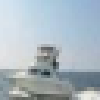

In [97]:
# (data+1)/2是为了还原被归一化的数据
show((data+1)/2).resize((100, 100))

ship deer car truck


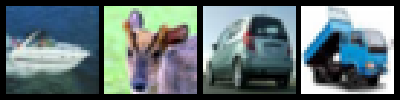

In [99]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(' '.join('%1ls' % classes[labels[j]] for j in range(4)))
show(tv.utils.make_grid((images+1) / 2)).resize((400, 100))

In [100]:
labels


 8
 4
 1
 9
[torch.LongTensor of size 4]

In [101]:
class Net(nn.Module):
    
    def __init__(self):
        # nn.Module子类的函数必须在构造函数中执行父类的构造函数
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # 仿射层/全连接层 y = Wx+b
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        # 卷积-> 激活 -> 池化
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        # reshape '1'表示自适应
        x = x.view(x.size()[0], -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
net = Net()

In [102]:
net

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [104]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [107]:
for epoch in range(2):
    running_loss = 0.0
    for i,data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = Variable(inputs), Variable(labels)
        
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.data[0]
        
        if i % 2000 == 1999:
            print('[%d, %5d] loss : % .3f' \
                    % (epoch+1, i+1, running_loss/2000))
            running_loss = 0.0
print("Finished Training!")

[1,  2000] loss :  1.878
[1,  4000] loss :  1.708
[1,  6000] loss :  1.590
[1,  8000] loss :  1.520
[1, 10000] loss :  1.483
[1, 12000] loss :  1.427
[2,  2000] loss :  1.350
[2,  4000] loss :  1.347
[2,  6000] loss :  1.336
[2,  8000] loss :  1.309
[2, 10000] loss :  1.289
[2, 12000] loss :  1.275
Finished Training!


In [108]:
# 遍历完一遍数据集称为一个epoch

实际的label:       cat     ship     ship    plane


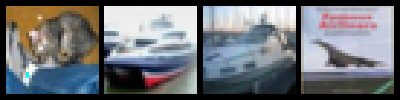

In [109]:
dataiter = iter(testloader)
images, labels = dataiter.next()
print('实际的label: ', ' '.join('%08s' % classes[labels[j]] for j in range(4)))
show(tv.utils.make_grid(images / 2 - 0.5)).resize((400, 100))

In [110]:
# 计算图片在每个类别上的分数
outputs = net(Variable(images))
# 得分最高的那个类
_, predicted = t.max(outputs.data, 1)
print('预测结果：', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

预测结果：  bird  ship  ship  ship


In [111]:
# 计算整个测试集的结果
correct = 0
total = 0
for data in testloader:
    iamges, labels = data
    outputs = net(Variable(images))
    _, predicted = t.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()
print('10000张测试集中的准确率位 %d %%' % (100 * correct / total))

10000张测试集中的准确率位 9 %


## 在GPU上训练

In [117]:
if t.cuda.is_available():
    net.cuda()
    images = images.cuda()
    labels = labels.cuda()
    output = net(Variable(images))
    loss = criterion(output, Variable(labels))

In [118]:
loss

Variable containing:
 5.2756
[torch.cuda.FloatTensor of size 1 (GPU 0)]

In [119]:
a = t.Tensor(2, 3)

In [120]:
a


1.00000e-23 *
  5.9938  0.0000  0.0000
  0.0000  0.0000  0.0000
[torch.FloatTensor of size 2x3]

In [121]:
b = t.Tensor([[1, 2, 3], [4, 5, 6]])

In [122]:
b


 1  2  3
 4  5  6
[torch.FloatTensor of size 2x3]

In [123]:
b.tolist()

[[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]]

In [124]:
b_size = b.size()

In [125]:
b_size

torch.Size([2, 3])

In [128]:
b.numel() # b中元素总个数

6

In [129]:
c = t.Tensor(b_size)

In [130]:
c


1.00000e-23 *
  5.9938  0.0000  0.0000
  0.0000  0.0000  0.0000
[torch.FloatTensor of size 2x3]

In [131]:
d = t.Tensor((2, 3))

In [132]:
d


 2
 3
[torch.FloatTensor of size 2]

In [133]:
c.shape

torch.Size([2, 3])

In [136]:
t.Size([2, 3])

torch.Size([2, 3])

In [137]:
t.ones(2, 3)


 1  1  1
 1  1  1
[torch.FloatTensor of size 2x3]

In [138]:
t.zeros(2, 3)


 0  0  0
 0  0  0
[torch.FloatTensor of size 2x3]

In [139]:
t.arange(1, 6, 2)


 1
 3
 5
[torch.FloatTensor of size 3]

In [146]:
t.randn(2, 3)


 0.5395 -0.4320 -0.3375
 0.7820  1.0499  1.1052
[torch.FloatTensor of size 2x3]

In [147]:
t.randperm(5)


 2
 0
 1
 4
 3
[torch.LongTensor of size 5]

In [148]:
a = t.arange(0, 6)

In [149]:
a


 0
 1
 2
 3
 4
 5
[torch.FloatTensor of size 6]

In [150]:
a.view(2, 3)


 0  1  2
 3  4  5
[torch.FloatTensor of size 2x3]

In [151]:
b = a.view(-1, 3) # -1代表自动计算

In [152]:
b


 0  1  2
 3  4  5
[torch.FloatTensor of size 2x3]

In [153]:
b.unsqueeze(1) # 在第1维（下标从0开始）中增加"1"


(0 ,.,.) = 
  0  1  2

(1 ,.,.) = 
  3  4  5
[torch.FloatTensor of size 2x1x3]

In [154]:
b.unsqueeze(-2) # -2表示倒数第2个维度


(0 ,.,.) = 
  0  1  2

(1 ,.,.) = 
  3  4  5
[torch.FloatTensor of size 2x1x3]

In [155]:
b.unsqueeze(0)


(0 ,.,.) = 
  0  1  2
  3  4  5
[torch.FloatTensor of size 1x2x3]

In [156]:
c = b.view(1, 1, 1, 2, 3)

In [157]:
c


(0 ,0 ,0 ,.,.) = 
  0  1  2
  3  4  5
[torch.FloatTensor of size 1x1x1x2x3]

In [158]:
c.squeeze(0) # 压缩第0维的"1”


(0 ,0 ,.,.) = 
  0  1  2
  3  4  5
[torch.FloatTensor of size 1x1x2x3]

In [159]:
c.squeeze() # 把所有维度位"1”的亚索


 0  1  2
 3  4  5
[torch.FloatTensor of size 2x3]

In [160]:
a[1] = 100

In [161]:
b


   0  100    2
   3    4    5
[torch.FloatTensor of size 2x3]

In [162]:
b


   0  100    2
   3    4    5
[torch.FloatTensor of size 2x3]

In [163]:
b.resize_(1, 3)


   0  100    2
[torch.FloatTensor of size 1x3]

In [164]:
b.resize_(3, 3)


   0.0000  100.0000    2.0000
   3.0000    4.0000    5.0000
   0.0000    0.0000    0.0000
[torch.FloatTensor of size 3x3]

In [3]:
a = t.randn(3, 4)

In [4]:
a


-0.2260 -0.4493 -1.1600 -0.0047
 0.8387  0.1451 -0.5332 -1.4381
 2.3963  1.1326 -0.8151  0.8592
[torch.FloatTensor of size 3x4]

In [5]:
a[0] # 第0行


-0.2260
-0.4493
-1.1600
-0.0047
[torch.FloatTensor of size 4]

In [6]:
a[:, 0] # 第0列


-0.2260
 0.8387
 2.3963
[torch.FloatTensor of size 3]

In [171]:
a[0][2] # 第0行第2个元素

-1.9875363111495972

In [7]:
a[0, -1] # 第0行最后一个元素

-0.004724749363958836

In [8]:
a[:2]


-0.2260 -0.4493 -1.1600 -0.0047
 0.8387  0.1451 -0.5332 -1.4381
[torch.FloatTensor of size 2x4]

In [9]:
a[:2, 0:2]


-0.2260 -0.4493
 0.8387  0.1451
[torch.FloatTensor of size 2x2]

In [10]:
a[0, :2]


-0.2260
-0.4493
[torch.FloatTensor of size 2]

In [11]:
a > 1


 0  0  0  0
 0  0  0  0
 1  1  0  0
[torch.ByteTensor of size 3x4]

In [12]:
a[a>1]


 2.3963
 1.1326
[torch.FloatTensor of size 2]

In [14]:
a[t.LongTensor([0,1])] # 第0行和第1行


-0.2260 -0.4493 -1.1600 -0.0047
 0.8387  0.1451 -0.5332 -1.4381
[torch.FloatTensor of size 2x4]

In [15]:
a = t.arange(0, 16).view(4, 4)

In [16]:
a


  0   1   2   3
  4   5   6   7
  8   9  10  11
 12  13  14  15
[torch.FloatTensor of size 4x4]

In [17]:
# 选取对角线的元素
index = t.LongTensor([[0,1,2,3]])

In [18]:
index


 0  1  2  3
[torch.LongTensor of size 1x4]

In [19]:
a.gather(0, index)


  0   5  10  15
[torch.FloatTensor of size 1x4]

In [24]:
# 选取反对角线上的元素
index = t.LongTensor([[3,2,1,0]]).t()

In [25]:
index


 3
 2
 1
 0
[torch.LongTensor of size 4x1]

In [26]:
a.gather(1, index)


  3
  6
  9
 12
[torch.FloatTensor of size 4x1]

In [27]:
# 选取反对角线上的元素
index = t.LongTensor([[3, 2, 1, 0]])
a.gather(0, index)


 12   9   6   3
[torch.FloatTensor of size 1x4]

In [32]:
# 选取两个对角线上的元素
index = t.LongTensor([[0,1,2,3], [3,2,1,0]]).t() # .t()代表转置

In [33]:
index


 0  3
 1  2
 2  1
 3  0
[torch.LongTensor of size 4x2]

In [34]:
b = a.gather(1, index)

In [35]:
a


  0   1   2   3
  4   5   6   7
  8   9  10  11
 12  13  14  15
[torch.FloatTensor of size 4x4]

In [36]:
b


  0   3
  5   6
 10   9
 15  12
[torch.FloatTensor of size 4x2]

# 与gather对应的是scatter
#### out = input.gather(dim, index)
#### --> 近似逆操作
#### out = Tensor()
#### out.scatter_(dim, index)

In [37]:
c = t.zeros(4, 4)

In [38]:
c


 0  0  0  0
 0  0  0  0
 0  0  0  0
 0  0  0  0
[torch.FloatTensor of size 4x4]

In [39]:
c.scatter_(1, index, b)


  0   0   0   3
  0   5   6   0
  0   9  10   0
 12   0   0  15
[torch.FloatTensor of size 4x4]